In [0]:
!ls

class.csv  sample_data		  test.csv  train.csv
drive	   sample_submission.csv  test.zip  train.zip


In [0]:
# !cp car_clf.h5 /content/drive/'My Drive'/'Colab Notebooks'/Projects/'Kaggle 3rd ML Car CLF'/Model_save/xception_1.h5

In [0]:
!mkdir train
!cp train.zip train/
!unzip train/train.zip -d train

!mkdir test
!cp test.zip test/
!rm train.zip test.zip
!unzip test/test.zip -d test
!rm train/train.zip
!rm test/test.zip

Archive:  train/train.zip
  inflating: train/train_00001.jpg   
  inflating: train/train_00002.jpg   
  inflating: train/train_00003.jpg   
  inflating: train/train_00004.jpg   
  inflating: train/train_00005.jpg   
  inflating: train/train_00006.jpg   
  inflating: train/train_00007.jpg   
  inflating: train/train_00008.jpg   
  inflating: train/train_00009.jpg   
  inflating: train/train_00010.jpg   
  inflating: train/train_00011.jpg   
  inflating: train/train_00012.jpg   
  inflating: train/train_00013.jpg   
  inflating: train/train_00014.jpg   
  inflating: train/train_00015.jpg   
  inflating: train/train_00016.jpg   
  inflating: train/train_00017.jpg   
  inflating: train/train_00018.jpg   
  inflating: train/train_00019.jpg   
  inflating: train/train_00020.jpg   
  inflating: train/train_00021.jpg   
  inflating: train/train_00022.jpg   
  inflating: train/train_00023.jpg   
  inflating: train/train_00024.jpg   
  inflating: train/train_00025.jpg   
  inflating: train/train

In [0]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
from keras import models, layers 
from keras import callbacks
from keras.applications import Xception
import cv2
import time
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf

Using TensorFlow backend.


In [0]:
!ls 

class.csv  sample_data		  test	    train
drive	   sample_submission.csv  test.csv  train.csv


In [0]:
# !rm -r /content/train_chop

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
img = cv2.imread(f'/content/train/{train_df.iloc[0, 0]}')

In [0]:
img.shape

(500, 700, 3)

In [0]:
def chop_img(data_type, path_df, margin = 15):
  """
     ex) chip_img('trian', train_df, margin = 20)
     
     data_type = train or test as string         
     path_df = train_df or test_df,
     marging = how many pixel left over 
     
     this function create directory as data_type_chop """
  
  if f'{data_type}_chop' in os.listdir('/content/'):
    os.removedirs(f'{data_type}_chop')
  else:
    os.mkdir(f'{data_type}_chop')                                            # make directory
    
  for i in range(len(path_df.img_file)):
    img = cv2.imread(f'/content/{data_type}/{path_df.iloc[i, 0]}')               # load image
    cv2.waitKey(0)
    
    crop_img = img[path_df.iloc[i, 2] : path_df.iloc[i, 4],     # y : y + h
                   path_df.iloc[i,1] : path_df.iloc[i, 3]]     # x : x + w

    cv2.imwrite(f'/content/{data_type}_chop/{path_df.iloc[i,0]}', crop_img)  # save the image
    
    cv2.waitKey(0)

In [0]:
chop_img('train', train_df)

# After chop image

In [0]:
train_df = pd.read_csv('train.csv')
train_df.head()
train_df['class'] = train_df['class'].astype(str)

In [0]:
y = train_df['class']
x = train_df.drop('class', axis = 1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [0]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [0]:
validation_set = pd.concat([X_test, y_test], axis=1)

In [0]:
print(train_df.shape)
print('-----------------')
print(train_set.shape)
print(validation_set.shape)

(10016, 6)
-----------------
(8012, 6)
(2004, 6)


In [0]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
3058,train_03059.jpg,20,130,607,421,79
1240,train_01241.jpg,31,114,460,325,78
9584,train_09585.jpg,83,93,686,425,3
6642,train_06643.jpg,271,712,1429,1132,153
7442,train_07443.jpg,24,148,528,343,66


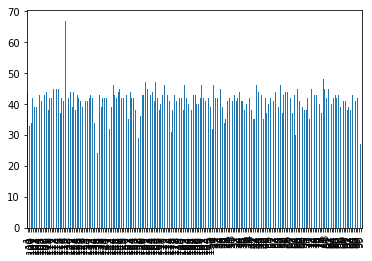

In [0]:
train_set['class'].value_counts().sort_index().plot(kind='bar')

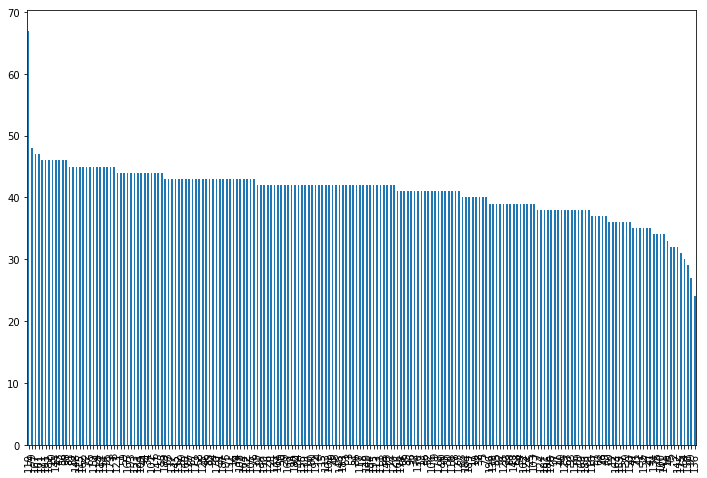

In [0]:
plt.figure(figsize=(12,8))
train_set['class'].value_counts().plot(kind='bar')

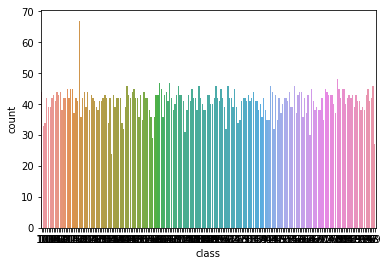

In [0]:
sns.countplot(train_set['class'])

In [0]:
train_set['class'].nunique()

196

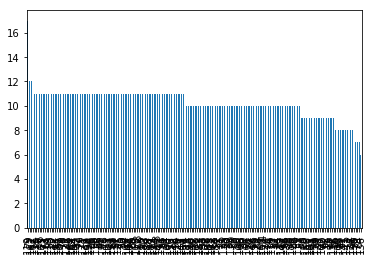

In [0]:
validation_set['class'].value_counts().plot(kind='bar')

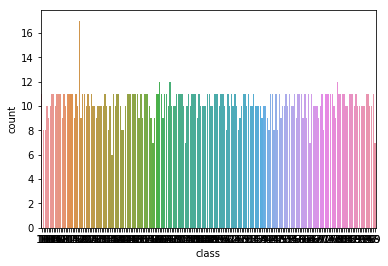

In [0]:
sns.countplot(validation_set['class'])

In [0]:
validation_set['class'].nunique()

196

Split Validation set  0.2 for Hold out set

In [0]:
validation_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
6873,train_06874.jpg,26,83,594,361,159
694,train_00695.jpg,100,73,706,516,173
3804,train_03805.jpg,40,66,269,164,14
8307,train_08308.jpg,64,17,442,251,105
3237,train_03238.jpg,74,43,569,407,99


In [0]:
val_x = validation_set.drop('class', axis=1)
val_y = validation_set['class']

In [0]:
X_val, X_hol, y_val, y_hol = train_test_split(val_x, val_y, test_size= 0.2, stratify = val_y)

In [0]:
print(X_val.shape, y_val.shape)

(1603, 5) (1603,)


In [0]:
validation_set = pd.concat([X_val, y_val], axis=1)
hold_out_set = pd.concat([X_hol, y_hol], axis=1)

In [0]:
print(validation_set.shape)
print(hold_out_set.shape)

(1603, 6)
(401, 6)


In [0]:
print('validation : ', validation_set['class'].nunique())
print('hold_out : ', hold_out_set['class'].nunique())

validation :  196
hold_out :  196


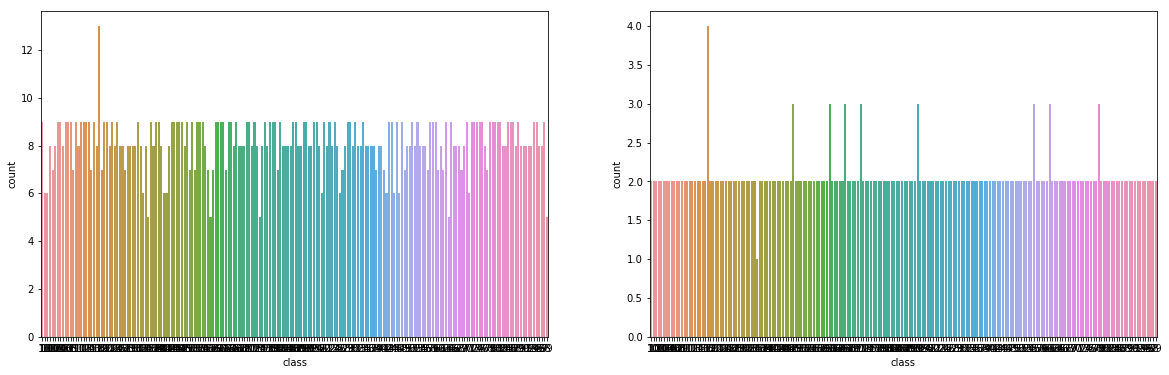

In [0]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.countplot('class', data = validation_set)

plt.subplot(1,2,2)
sns.countplot('class', data = hold_out_set)

Spliting Done

In [0]:
print('Training Set, "train_set" :', train_set.shape)
print('Validation Set, "validation_set" :', validation_set.shape)
print('Hold Out Set, "hold_out_set" :', hold_out_set.shape)

Training Set, "train_set" : (8012, 6)
Validation Set, "validation_set" : (1603, 6)
Hold Out Set, "hold_out_set" : (401, 6)


In [0]:
train_set.head()

,img_file,bbox_x1,bbox_y1,bbox_x2,bbox_y2,class
3058,train_03059.jpg,20,130,607,421,79
1240,train_01241.jpg,31,114,460,325,78
9584,train_09585.jpg,83,93,686,425,3
6642,train_06643.jpg,271,712,1429,1132,153
7442,train_07443.jpg,24,148,528,343,66


In [0]:
datagen = image.ImageDataGenerator(rescale=1./255,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2, 
                                  rotation_range=20,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  shear_range=0.2)

validation_gen = image.ImageDataGenerator(rescale = 1./255)

holdout_gen = image.ImageDataGenerator(rescale = 1./255)

In [0]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(299,299), class_mode='categorical', batch_size=32)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=32)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=32)

Found 8012 validated image filenames belonging to 196 classes.
Found 1603 validated image filenames belonging to 196 classes.
Found 401 validated image filenames belonging to 196 classes.


In [0]:
i = 0
for batch in train_data:
  img_array = batch[0]
  #print(img_array.shape)
  #print(img_array[i])
  for j in range(len(batch[0])):
    plt.figure(j)
    plt.imshow(img_array[j])
    
  i += 1
  if i % 5:
    break

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from keras.applications import InceptionResNetV2, NASNetLarge, nasnet
from keras import models, layers
from keras.utils import plot_model
from keras import callbacks
from keras import optimizers

In [0]:
incep_res = InceptionResNetV2(input_shape=(299,299,3), include_top=False)

W0709 03:25:42.659214 139736725755776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 03:25:42.705901 139736725755776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 03:25:42.714696 139736725755776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 03:25:42.751168 139736725755776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0709 03:25:42.752512 1397367257

219062272/219055592 [==============================] - 7s 0us/step


In [0]:
plot_model(incep_res, 'inception_resnet.png')

In [0]:
incep_res.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
model = models.Sequential()
model.add(incep_res)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation(activation='relu'))
model.add(layers.Dense(196, activation = 'softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0709 03:26:59.615929 139736725755776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model_checkpoint = callbacks.ModelCheckpoint('inception_resnet_model.h5', save_best_only=True, monitor='val_loss')

In [0]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(299,299), class_mode='categorical', batch_size=32)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=32)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(299,299), class_mode='categorical', batch_size=32)

Found 8012 validated image filenames belonging to 196 classes.
Found 1603 validated image filenames belonging to 196 classes.
Found 401 validated image filenames belonging to 196 classes.


In [0]:
model.fit_generator(train_data, steps_per_epoch=8012//32, epochs=100, validation_data=valid_data, validation_steps=1603//32, callbacks=[model_checkpoint])

W0709 03:27:19.797099 139736725755776 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
250/250 [==============================] - 791s 3s/step - loss: 5.5990 - acc: 0.0129 - val_loss: 16.0274 - val_acc: 0.0056
Epoch 2/100
250/250 [==============================] - 735s 3s/step - loss: 5.5092 - acc: 0.0130 - val_loss: 11.1733 - val_acc: 0.0057
Epoch 3/100
250/250 [==============================] - 731s 3s/step - loss: 5.4301 - acc: 0.0193 - val_loss: 8.2624 - val_acc: 0.0102
Epoch 4/100
250/250 [==============================] - 729s 3s/step - loss: 5.4455 - acc: 0.0175 - val_loss: 7.5563 - val_acc: 0.0223
Epoch 5/100
250/250 [==============================] - 724s 3s/step - loss: 5.3766 - acc: 0.0221 - val_loss: 15.9211 - val_acc: 0.0057
Epoch 6/100
250/250 [==============================] - 721s 3s/step - loss: 5.3017 - acc: 0.0292 - val_loss: 6.5224 - val_acc: 0.0293
Epoch 7/100
250/250 [==============================] - 724s 3s/step - loss: 5.2210 - acc: 0.0322 - val_loss: 5.3973 - val_acc: 0.0216
Epoch 8/100
250/250 [==============================] - 724s

KeyboardInterrupt: ignored

In [0]:
!cp /content/nas_model.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/inception_resnet.h5

## Load model to continue train

In [0]:
from keras.models import load_model

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
model = load_model('/content/drive/My Drive/Colab Notebooks/0.Projects/Kaggle 3rd ML Car CLF/Model_save/inception_resnet.h5')

W0709 10:50:25.369225 140312288622464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 10:50:25.519421 140312288622464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 10:50:25.556630 140312288622464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 10:50:25.557937 140312288622464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0709 10:50:25.559938 140312288

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 8, 8, 1536)        54336736  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1536)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1573888   
_________________________________________________________________
batch_normalization_204 (Bat (None, 1024)              4096      
_________________________________________________________________
activation_204 (Activation)  (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               200900    
Total params: 56,115,620
Trainable params: 56,053,028
Non-trainable params: 62,592
___________________________________________________________

In [0]:
model_checkpoint = callbacks.ModelCheckpoint('inception_resnet_model.h5', save_best_only=True, monitor='val_loss')

In [0]:
model.fit_generator(train_data, steps_per_epoch=8012//32, epochs=100, validation_data=valid_data, validation_steps=1603//32, callbacks=[model_checkpoint])

Epoch 1/100
250/250 [==============================] - 754s 3s/step - loss: 1.4094 - acc: 0.6048 - val_loss: 2.6199 - val_acc: 0.3962
Epoch 2/100
250/250 [==============================] - 706s 3s/step - loss: 1.2813 - acc: 0.6367 - val_loss: 2.8021 - val_acc: 0.3889
Epoch 3/100
250/250 [==============================] - 702s 3s/step - loss: 1.1243 - acc: 0.6796 - val_loss: 2.7708 - val_acc: 0.4316
Epoch 4/100
250/250 [==============================] - 702s 3s/step - loss: 1.0088 - acc: 0.7125 - val_loss: 5.6410 - val_acc: 0.1789
Epoch 5/100
250/250 [==============================] - 703s 3s/step - loss: 0.9062 - acc: 0.7392 - val_loss: 2.6584 - val_acc: 0.4150
Epoch 6/100
250/250 [==============================] - 702s 3s/step - loss: 0.8168 - acc: 0.7636 - val_loss: 2.4637 - val_acc: 0.4812
Epoch 7/100
250/250 [==============================] - 703s 3s/step - loss: 0.7437 - acc: 0.7841 - val_loss: 3.1156 - val_acc: 0.4252
Epoch 8/100
250/250 [==============================] - 702s 3s

KeyboardInterrupt: ignored

In [0]:
!cp /content/inception_resnet_model.h5 /content/drive/'My Drive'/'Colab Notebooks'/'0.Projects'/inception_resnet.h5

# Nas net too heavy

In [0]:
nas_model = NASNetLarge(input_shape=(331,331,3), include_top=False)

In [0]:
nas_model.summary()

In [0]:
plot_model(nas_model, 'nas.png')

In [0]:
model = models.Sequential()
model.add(nas_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2016))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(196, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2016)              8130528   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2016)              8064      
_________________________________________________________________
activation_261 (Activation)  (None, 2016)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               395332    
Total params: 93,450,742
Trainable params: 93,250,042
Non-trainable params: 200,700
__________________________________________________________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0709 01:26:34.956476 140709458945920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
model_checkpoint = callbacks.ModelCheckpoint('nas_model.h5', save_best_only=True, monitor='val_loss')

In [0]:
train_data = datagen.flow_from_dataframe(train_set, '/content/train_chop', x_col='img_file', y_col='class', target_size=(331,331), class_mode='categorical', batch_size=10)

valid_data = validation_gen.flow_from_dataframe(validation_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(331,331), class_mode='categorical', batch_size=10)

holdout_data = holdout_gen.flow_from_dataframe(hold_out_set, '/content/train_chop', x_col = "img_file", y_col = "class", target_size=(331,331), class_mode='categorical', batch_size=10)

Found 8012 validated image filenames belonging to 196 classes.
Found 1603 validated image filenames belonging to 196 classes.
Found 401 validated image filenames belonging to 196 classes.


In [0]:
model.fit_generator(train_data, steps_per_epoch=8012//10, epochs=100, validation_data=valid_data, validation_steps=1603//10, callbacks=[model_checkpoint])